#### Data Story: Phone Brand Comparison in Ukraine

Since Motorola's groundbreaking innovation in 1973, cellphones have transformed our world. From simple communication tools to pocket-sized computers, they have become indispensable for connecting, sharing, and socializing. But with so many brands and models, the question remains: **Which cellphone brand reigns supreme?**

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
import datetime

### First things first: Data

In [2]:
df = pd.read_csv('phones_data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.dropna(inplace=True)
df.rename(columns={'popularity':'amount_purchased'}, inplace=True)
df.head()

,brand_name,model_name,os,amount_purchased,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.8,64.0,3400.0,6-2018


In [3]:
df.columns

Index(['brand_name', 'model_name', 'os', 'amount_purchased', 'best_price',
       'lowest_price', 'highest_price', 'sellers_amount', 'screen_size',
       'memory_size', 'battery_size', 'release_date'],
      dtype='object')

### Questions to answer:
Does the size matter?
Price?
Battery life? Or is it all about marketing?

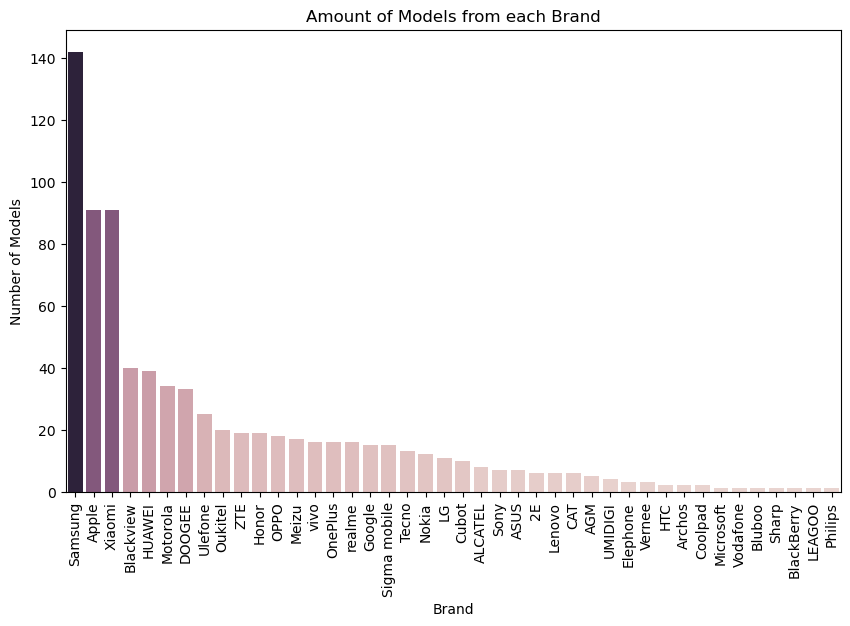

In [4]:
#Let's analyze the amount of models from each brand
brand_counts = df['brand_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, hue=brand_counts, legend=False)
plt.title('Amount of Models from each Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=90)
plt.show()

**Based on this bargraph, Samsung has the highest amount of phone models.**

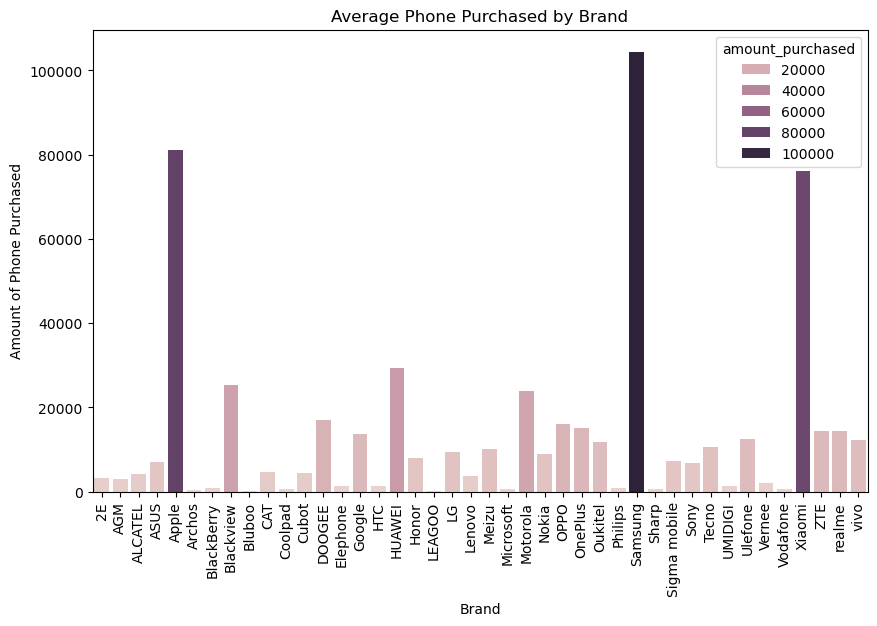

In [5]:
#Time to analyze amount purchased
brand_totals = df.groupby('brand_name')['amount_purchased'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='brand_name', y='amount_purchased', data=brand_totals, hue='amount_purchased')
plt.title('Average Phone Purchased by Brand')
plt.xlabel('Brand')
plt.ylabel('Amount of Phone Purchased')
plt.xticks(rotation=90)
plt.show()


**With a large amount of variety in smartphone models, Samsung has received a significant popularity in Ukraine.**

Their smartphones have consistently been top-sellers among Ukrainian consumers. But why?

### Does screen size have anything to do with it?

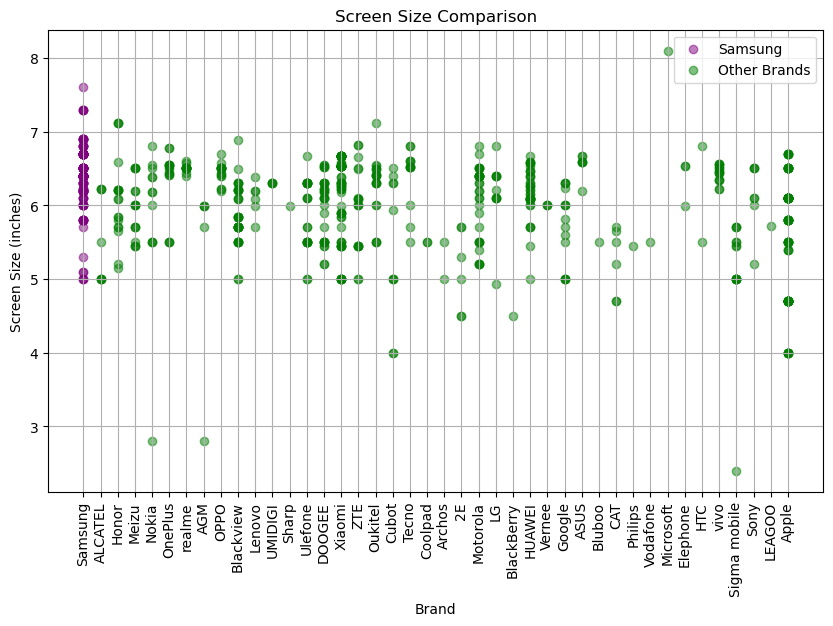

In [6]:
#Let's compare the screen size
samsung_data = df[df['brand_name'] == 'Samsung']
other_brands = df[df['brand_name'] != 'Samsung']

#Plot it
plt.figure(figsize=(10, 6))
plt.scatter(samsung_data['brand_name'], samsung_data['screen_size'], color='purple', label='Samsung', alpha=0.5)
plt.scatter(other_brands['brand_name'], other_brands['screen_size'], color='green', label='Other Brands', alpha=0.5)
plt.title('Screen Size Comparison')
plt.xlabel('Brand')
plt.ylabel('Screen Size (inches)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

**Based on this data, Samsung smartphones feature screens in various sizes.**

This means they offer screen sizes that are beneficial to all types of consumers: those that prefer larger screen size, but not too large to be cumbersome, and also not too small to compromise on viewing experience.

### What about the battery size?
Let's continue comparing ASUS smartphones with other brands based on their battery size.

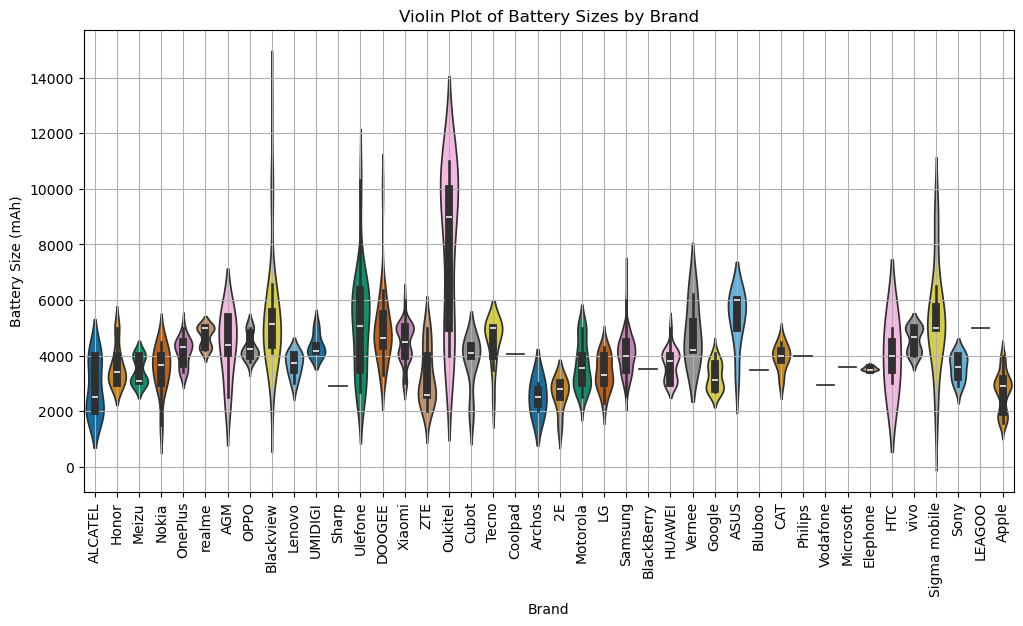

In [7]:
#Let's use a violin plot to provide us with a more detailed view of the distribution
plt.figure(figsize=(12, 6))
unique_brands = df['brand_name'].unique()
palette = sns.color_palette('colorblind', len(unique_brands))
brand_color_map = {brand_name: palette[i] for i, brand_name in enumerate(unique_brands)}
sns.violinplot(x='brand_name', y='battery_size', data=df, hue='brand_name', palette=brand_color_map, split=False)
plt.title('Violin Plot of Battery Sizes by Brand')
plt.xlabel('Brand')
plt.ylabel('Battery Size (mAh)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**The violin plot clearly demonstrates a significant disparity in battery sizes among the brands.**

ASUS, Oukitel, and UMIDIGI stand out with notably larger median battery capacities and broader distributions, indicating a wider range of battery options. On the other hand, Apple, Sony, and Sigma mobile tend to have a smaller median battery sizes and narrower distributions, which suggests that there may be a more focused approach on battery efficiency or other deisgn priorities. Samsung has a relatively wide range of battery sizes compared to other brands, however, the median battery size for Samsung is not as high as some other brands which could also mean they prioritize other factors like design, performance, or features over extremely large batteries.

### Does the price matter?

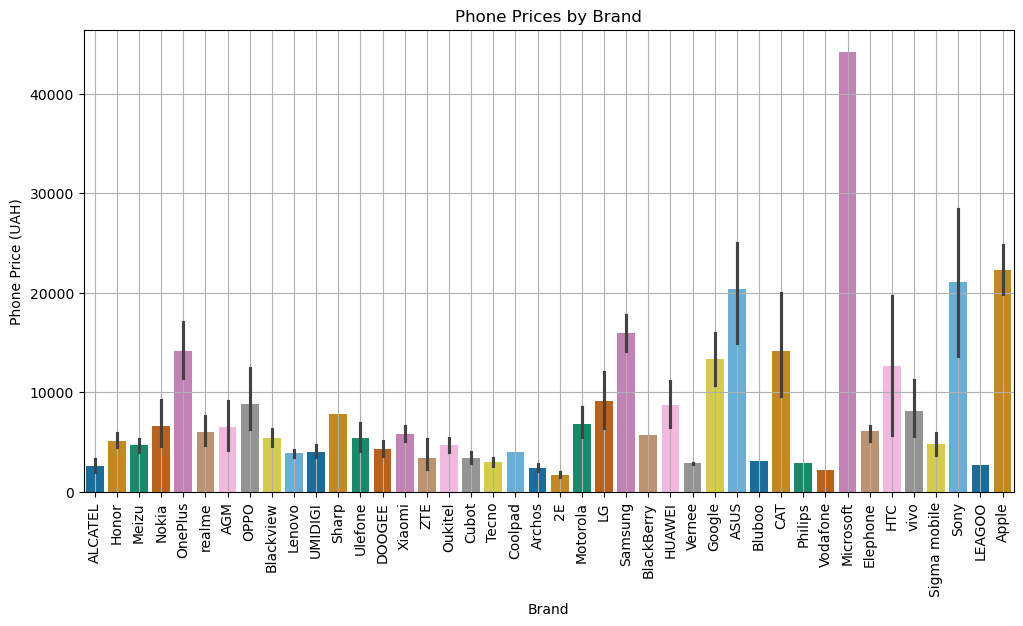

In [8]:
#Compare prices with brands
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='best_price', data=df, hue='brand_name', legend=False, palette=brand_color_map)
plt.title('Phone Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Phone Price (UAH)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**The barplot shows that Samsung has a relatively wide range of phone prices.**

While the range is wide, the average price of Samsung phones is not as high as some other brands. Samsung seems to offer more affordable options within their range, yet still competitive within the market, creating a balance of premium and more affordable models.

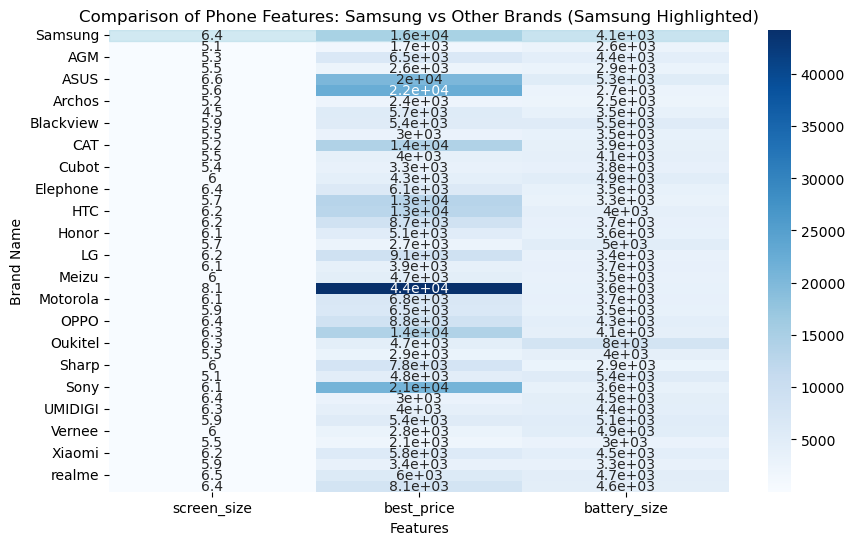

In [9]:
average_values = df.groupby('brand_name')[['screen_size', 'best_price', 'battery_size']].mean().reset_index()

# Identify the most purchased brand
brand_totals = df.groupby('brand_name')['amount_purchased'].sum().reset_index()
most_purchased_brand = brand_totals.loc[brand_totals['amount_purchased'].idxmax(), 'brand_name']

# Filter the DataFrame to include the most purchased brand and Samsung
comparison_data = average_values[average_values['brand_name'].isin([most_purchased_brand, 'Samsung'])]

# Include other brands for comparison
other_brands = average_values[~average_values['brand_name'].isin([most_purchased_brand, 'Samsung'])]
comparison_data = pd.concat([comparison_data, other_brands])

# Set the brand name as the index for the heatmap
comparison_data.set_index('brand_name', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_data, annot=True, cmap='Blues', cbar=True)

# Highlight Samsung with a different color
for i in range(comparison_data.shape[0]):
    if comparison_data.index[i] == 'Samsung':
        plt.gca().add_patch(plt.Rectangle((0, i), comparison_data.shape[1], 1, color='lightblue', alpha=0.5))

plt.title(f'Comparison of Phone Features: {most_purchased_brand} vs Other Brands (Samsung Highlighted)')
plt.xlabel('Features')
plt.ylabel('Brand Name')
plt.show()

### Look! More Data!

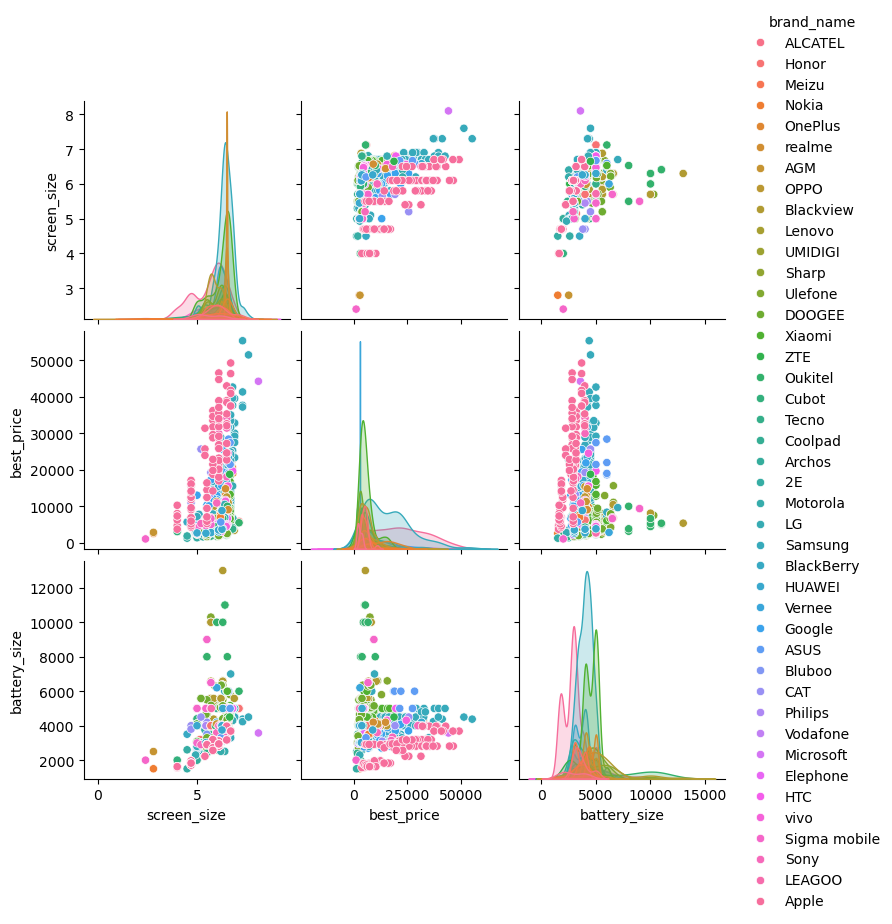

In [10]:
sns.pairplot(df, hue='brand_name', vars=['screen_size', 'best_price', 'battery_size'])

### Conclusion

**So which phone brand reigns supreme?**

Based on the screen size, price, and battery size, the smart phone that can do it all is none other than:

**SAMSUNG**
